In [7]:
!pip install spacy
!python -m spacy download en_core_web_sm

c:\Users\egha355\AppData\Local\Programs\Python\Python39\python.exe: No module named spacy


In [128]:
!pip install spacy_transformers

     ---------------------------------------- 304.1/304.1 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 186.7/186.7 kB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 224.5/224.5 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 268.0/268.0 kB 16.1 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 10.5 MB/s eta 0:00:00


# Import libraries

In [115]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm
import json
spacy.__version__

'3.5.2'

# Loading data and EDA

In [116]:
def load_json(file):
    with open(file, 'r') as f:
        return json.load(f)
    

train_data = load_json('data/train_data.json')

In [129]:
!python -m spacy init fill-config data/training/base_config.cfg data/training/config.cfg

✔ Auto-filled config with all values
✔ Saved config
data\training\config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [132]:
def get_spacy_doc(file, data):
    nlp = spacy.blank('en')
    db = DocBin()

    for text, annotation in tqdm(data):
        doc = nlp.make_doc(text)
        annot = annotation['entities']
        ents = []
        entity_indices = []
        for start, end, label in annot:
            skip_entity = False
            for idx in range(start, end):
                if idx in entity_indices:
                    skip_entity = True
                    break
            if skip_entity:
                continue

            entity_indices.extend(range(start, end))

            try:
                span = doc.char_span(start, end, label=label, alignment_mode='strict')
            except:
                print('Skipping entity')
                continue
            if span is None:
                err_data = str([start, end])+ "   "+ str(text) + '\n'
                file.write(err_data)
            else:
                ents.append(span)
        try:
            doc.ents = ents
            db.add(doc)
        except:
            print('Skipping doc')
            pass

    return db


In [135]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_data, test_size=0.3, random_state=42)

In [136]:
len(train), len(test)

(140, 60)

In [138]:
file = open('error.txt', 'w', encoding='utf-8')
db = get_spacy_doc(file, train)
db.to_disk('data/training/train.spacy')

db = get_spacy_doc(file, test)
db.to_disk('data/training/test.spacy')
file.close()

 21%|██        | 29/140 [00:00<00:01, 86.39it/s]

Skipping entity


100%|██████████| 60/60 [00:00<00:00, 89.86it/s]


In [146]:
!python -m spacy train data/training/config.cfg --output ./output --paths.train data/training/train.spacy --paths.dev data/training/test.spacy --gpu-id 0 --verbose

ℹ Saving to output directory: output
ℹ Using GPU: 0


[2023-05-18 02:25:02,244] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
Traceback (most recent call last):
  File "c:\users\egha355\appdata\local\programs\python\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\egha355\appdata\local\programs\python\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\egha355\Envs\datascience\lib\site-packages\spacy\__main__.py", line 4, in <module>
    setup_cli()
  File "c:\Users\egha355\Envs\datascience\lib\site-packages\spacy\cli\_util.py", line 74, in setup_cli
    command(prog_name=COMMAND)
  File "c:\Users\egha355\Envs\datascience\lib\site-packages\click\core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "c:\Users\egha355\Envs\datascience\lib\site-packages\typer\core.py", line 778, in main
    return _main(
  File "c:\Users\egha355\Envs\datascience\lib\site-packages\typer\core.py", line 216, in

In [ ]:
nlp = spacy.load('output/model-best')
doc = nlp('my name is Elias. I worked at Microsoft. I have experience in python, java, and c++')
for ent in doc.ents:
    print(ent.text, ent.label_)

In [113]:
nlp = spacy.blank("en")
# the DocBin will store the example documents
db = DocBin()
for text, annotations in train_data:
    doc = nlp(text)
    ents = []
    for start, end, label in annotations['entities']:
        if label == 'Skills':
            span = doc.char_span(start, end, label=label)
            if span:
                ents.append(span)
    doc.ents = ents
    db.add(doc)
db.to_disk("./train.spacy")

ValueError: [E1010] Unable to set entity information for token 333 which is included in more than one span in entities, blocked, missing or outside.

In [68]:
df.columns

RangeIndex(start=0, stop=2, step=1)

<AxesSubplot:>

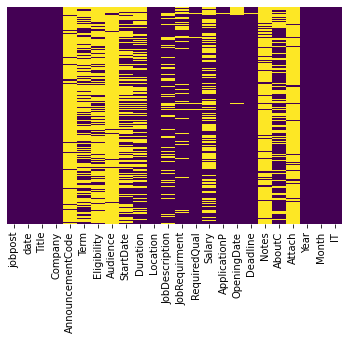

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
df.head(1)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False


In [31]:
df["Title"].nunique()

8636

In [33]:
df.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [38]:
df["Title"].value_counts().head(10)

Accountant                  328
Chief Accountant            219
Medical Representative      216
Sales Manager               166
Administrative Assistant    155
Lawyer                      151
Software Developer          134
Project Manager             117
English Language Courses    109
Web Developer               101
Name: Title, dtype: int64

In [10]:
df.tail(2)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False
19000,"""Kamurj"" UCO CJSC\r\n\r\n\r\nTITLE: Lawyer in...","Dec 30, 2015",Lawyer in Legal Department,"""Kamurj"" UCO CJSC",NaN,Full-time,NaN,NaN,NaN,Indefinite,...,NaN,All qualified applicants are encouraged to\r\n...,30 December 2015,20 January 2016,NaN,"""Kamurj"" UCO CJSC is providing micro and small...",NaN,2015,12,False


In [39]:
print(df['jobpost'][0])

AMERIA Investment Consulting Company
JOB TITLE:  Chief Financial Officer
POSITION LOCATION: Yerevan, Armenia
JOB DESCRIPTION:   AMERIA Investment Consulting Company is seeking a
Chief Financial Officer. This position manages the company's fiscal and
administrative functions, provides highly responsible and technically
complex staff assistance to the Executive Director. The work performed
requires a high level of technical proficiency in financial management
and investment management, as well as management, supervisory, and
administrative skills.
JOB RESPONSIBILITIES:  
- Supervises financial management and administrative staff, including
assigning responsibilities, reviewing employees' work processes and
products, counseling employees, giving performance evaluations, and
recommending disciplinary action;
- Serves as member of management team participating in both strategic
and operational planning for the company;
- Directs and oversees the company's financial management activities,
in

In [41]:
df['Location'].value_counts()

Yerevan, Armenia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## EDA
The data location is mostly for Armenia and Georgia. But the roles are diverse and the structure of the job description is good for the machine learning.
For the purpose of this task, to make the code run faster I will try a subset of the data with 300 examples.

In [59]:
df = df.sample(n=300, random_state=42, ignore_index=True)
df = df[['jobpost']]
df['id'] = df.index + 1
df = df[['id', 'jobpost']]
df.head(2)

,id,jobpost
0,1,T Lab\r\nTITLE: iOS Developer\r\nTERM: Full ...
1,2,SAS Group LLC\r\nTITLE: C++ Programmer\r\nDUR...


# Data pipeline
We do preprocessing by removing stopwords, email, or numbers.

## preprocessing

Let's first look at the first job description

In [60]:
df['jobpost'][0]

'T Lab\r\nTITLE:  iOS Developer\r\nTERM:  Full time\r\nSTART DATE/ TIME:  Immediately\r\nDURATION:  Long term\r\nLOCATION:  Yerevan, Armenia\r\nJOB DESCRIPTION:  T. Lab is looking for a hardworking individual to fill\r\nthe position of iOS Developer. The successful candidate will apply\r\nexperience with mobile technology/ solutions and business operations of\r\nstart-ups.\r\nJOB RESPONSIBILITIES:\r\n- Architect, build and manage set of iOS applications;\r\n- Work with team members on server-side integration;\r\n- Work with Designers to help define and implement User Interface\r\nimprovements;\r\n- Work with customer teams to understand requirements and expectations;\r\n- Implement conversion experiments (A/ B tests);\r\n- Participate in task estimates;\r\n- Ensure high quality in deliverables.\r\nREQUIRED QUALIFICATIONS:\r\n- Passion for social innovation and new technology tools;\r\n- Experience in iOS application development using iOS SDK;\r\n- Strong foundation in Objective-C and X

We need to remove punctuations, stop words and non-alphabetic characters. We should note that some skills such as C++,C#, .NET, Vue.js will not be extracted.
One way to fix this is to create spacial tokens for them in spaCy. Knowing this, we continue with the preprocessing. 

In [65]:
# cleaning the data
from spacy.lang.en import English
nlp = spacy.blank("en")
ner = nlp.create_pipe("ner")
ner.add_label("SKILL")
nlp.add_pipe(ner, name="skill_ner")
nlp.to_disk("skill_model")

ValueError: [E966] `nlp.add_pipe` now takes the string name of the registered component factory, not a callable component. Expected string, but got <spacy.pipeline.ner.EntityRecognizer object at 0x00000272D1C24660> (name: 'skill_ner').

- If you created your component with `nlp.create_pipe('name')`: remove nlp.create_pipe and call `nlp.add_pipe('name')` instead.

- If you passed in a component like `TextCategorizer()`: call `nlp.add_pipe` with the string name instead, e.g. `nlp.add_pipe('textcat')`.

- If you're using a custom component: Add the decorator `@Language.component` (for function components) or `@Language.factory` (for class components / factories) to your custom component and assign it a name, e.g. `@Language.component('your_name')`. You can then run `nlp.add_pipe('your_name')` to add it to the pipeline.

In [ ]:
# Training data
class TrainDataGenerator:
    def __init__(self, text):
        self.text = text
        self.entities = []

    def add_entity(self, searchTerm = '', entity_name=''):
        try:
            response = re.search(searchTerm, self.text)
            data_entity = (response.start(), response.end(), entity_name)
            self.entities.append(data_entity)
        except Exception as e:pass

    def complete_entity(self):

        entity_tem = {"entities":self.entities}
        data = (self.text, entity_tem)

        entities = entity_tem.get("entities")

        # check if entity first index is overlapping with another one
        for i in range(0, len(entities)):
            for j in range(i+1, len(entities)):


                StartIndex1 = entities[i][0]
                endIndex1 = entities[i][1]

                StartIndex2 = entities[j][0]
                endIndex2 = entities[j][1]

                if StartIndex1 in range(StartIndex2, endIndex2):
                    return False
                if endIndex2 in range(StartIndex2, endIndex2):
                    return False

        return data

In [10]:
# read job postings csv file and create data pipeline. remove header, and newline characters, normalize data, tokenize the text, and remove stop words, punctuation, and numbers,
# and lemmatize the text. transform text data into a format suitable for machine learning using word embeddings. You can use spaCy, NLTK, scikit-learning, or any other library
def read_data(file_path):
    data = pd.read_csv(file_path, header=None, names=['job_title', 'job_description'])
    data['job_description'] = data['job_description'].str.replace('\n', ' ')
    data['job_description'] = data['job_description'].str.replace('\r', ' ')
    data['job_description'] = data['job_description'].str.replace('\t', ' ')
    data['job_description'] = data['job_description'].str.replace('\xa0', ' ')
    data['job_description'] = data['job_description'].str.replace('\u200b', ' ')
    data['job_description'] = data['job_description'].str.replace('\u200c', ' ')
    data['job_description'] = data['job_description'].str.replace('\u200d', ' ')

    return data

# normalize data
def normalize_data(data):
    data['job_description'] = data['job_description'].str.lower()
    data['job_description'] = data['job_description'].str.replace(r'\d+','')
    data['job_description'] = data['job_description'].str.replace(r'\W',' ')
    data['job_description'] = data['job_description'].str.replace(r'\s+',' ')
    data['job_description'] = data['job_description'].str.strip()

    return data

# tokenize the text using the libraries mentioned above
def tokenize_text(data):
    nlp = spacy.load('en_core_web_sm')
    data['job_description'] = data['job_description'].apply(lambda x: nlp(x))
    data['job_description'] = data['job_description'].apply(lambda x: [token.lemma_ for token in x if not token.is_stop and not token.is_punct and not token.is_digit and not token.is_space])

    return data

# normalize the remaining dat to their base form using lemmatization. use the libraries mentioned above
def lemmatize_text(data):
    data['job_description'] = data['job_description'].apply(lambda x: ' '.join(x))

    return data

# transform text data into a format suitable for machine learning using word embeddings. use the libraries mentioned above
data = read_data('job_postings.csv')
data = normalize_data(data)
data = tokenize_text(data)
data = lemmatize_text(data)


# Machine learning model
# we want to extract the skills from the job description. we will use the job title as the label for the job description. we will use the libraries mentioned above to train a machine learning model
# we can use spaCY, NLTK, scikit-learn, tensorflow or any other library
# the model should take in the transformed text data from the data pipeline and generate a list of skills that are mentioned in the text (job description).

# train the model
def train_model(data):
    TRAIN_DATA = []
    for index, row in data.iterrows():
        TRAIN_DATA.append((row['job_description'], {'entities': [(0, len(row['job_title']), 'JOB_TITLE')]}))

    nlp = spacy.blank('en')
    nlp.vocab.vectors.name = 'spacy_pretrained_vectors'
    optimizer = nlp.begin_training()

    for itn in range(10):
        random.shuffle(TRAIN_DATA)
        losses = {}
        batches = minibatch(TRAIN_DATA, size=compounding(4., 32., 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.35, losses=losses)
        print('Losses', losses)

    return nlp

# test the model
def test_model(nlp, data):
    data['job_description'] = data['job_description'].apply(lambda x: nlp(x))
    data['job_description'] = data['job_description'].apply(lambda x: [token.lemma_ for token in x if not token.is_stop and not token.is_punct and not token.is_digit and not token.is_space])
    data['job_description'] = data['job_description'].apply(lambda x: ' '.join(x))

    return data

# evaluate the model
def evaluate_model(nlp, data):
    data['job_description'] = data['job_description'].apply(lambda x: nlp(x))
    data['job_description'] = data['job_description'].apply(lambda x: [token.lemma_ for token in x if not token.is_stop and not token.is_punct and not token.is_digit and not token.is_space])
    data['job_description'] = data['job_description'].apply(lambda x: ' '.join(x))

    return data

# save the model
def save_model(nlp, output_dir):
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.meta['name'] = 'job_title'
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

# load the model
def load_model(input_dir):
    input_dir = Path(input_dir)
    nlp = spacy.load(input_dir)
    print("Loaded model from", input_dir)

    return nlp

# predict the skills from the job description
nlp = train_model(data)
data = test_model(nlp, data)



ValueError: max_df corresponds to < documents than min_df

,id,text
0,1,"""""""About the job Fuel50 is a cloud-based SaaS ..."
1,2,"""""""About the job Fuel50 is a cloud-based SaaS ..."


In [ ]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import json

with open("exercises/en/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())
with open("exercises/en/country_text.txt", encoding="utf8") as f:
    TEXT = f.read()

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Create a doc and reset existing entities
doc = nlp(TEXT)
doc.ents = []

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label="GPE")

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, "-->", span.text)

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])



# In this exercise, you’ll be writing a custom component that uses the PhraseMatcher to find animal names in the document and
# adds the matched spans to the doc.ents. A PhraseMatcher with the animal patterns has already been created as the variable matcher.
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", animal_patterns)

# Define the custom component
@Language.component("animal_component")
def animal_component_function(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(doc, start, end, label="ANIMAL") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe("animal_component", after="ner")
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])





# After creating the data for our corpus, we need to save it out to a .spacy file. The code from the previous example is already available.
import json
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span, DocBin

with open("exercises/en/iphone.json", encoding="utf8") as f:
    TEXTS = json.loads(f.read())

nlp = spacy.blank("en")
matcher = Matcher(nlp.vocab)
# Add patterns to the matcher
pattern1 = ([{"LOWER": "iphone"}, {"LOWER": "x"}])
pattern2 = [{"LOWER": "iphone"}, {"IS_DIGIT": True}]
matcher.add("GADGET", [pattern1, pattern2])
docs = []
for doc in nlp.pipe(TEXTS):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label=match_id) for match_id, start, end in matches]
    doc.ents = spans
    docs.append(doc)

doc_bin = DocBin(docs=docs)
doc_bin.to_disk("./train.spacy")


# The init config command auto-generates a config file for training with the default settings. We want to train a named entity recognizer, so we’ll generate a config file for one pipeline component, ner. Because we’re executing the command in a Jupyter environment in this course,
#     we’re using the prefix !. If you’re running the command in your local terminal, you can leave this out.
!python -m spacy init config ./config.cfg --lang en --pipeline ner


# Let’s use the config file generated in the previous exercise and the training corpus we’ve created to train a named entity recognizer!

# The train command lets you train a model from a training config file. A file config_gadget.cfg is already available in the directory exercises/en, as well as a file 
# train_gadget.spacy containing the training examples, and a file dev_gadget.spacy containing the evaluation examples. Because we’re executing the command in a Jupyter environment
# in this course, we’re using the prefix !.
# If you’re running the command in your local terminal, you can leave this out.
!python -m spacy train ./exercises/en/config_gadget.cfg --output ./output --paths.train ./exercises/en/train_gadget.spacy --paths.dev ./exercises/en/dev_gadget.spacy